In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# use this for interactive mode, but may reduce performance/battery life
#%matplotlib nbagg 

# This is one of the most important steps before modeling!

# We will discuss 2 major frameworks for creating visualizations:

- using Pandas visualization interface
- using matplotlib to make custom visuals

# When to use Pandas for visualization:

- You are pressed for time
- You're making a standard graphic, such as a histogram
- You're not worried about computational efficiency
- All of your data is contained inside a pandas dataframe

# When to use matplotlib for visualization:

- You don't have a looming deadline
- You're making a custom graphic
- You need something more "fancy" than a standard graphic
- You're dealing with "big" data or concerned with efficiency
- Your data doesn't come from a dataframe or is annoying to place into a dataframe

# Most of the time, it's best to use Pandas or Seaborn...

Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html) on charting

Seaborn [documentation](http://seaborn.pydata.org/)

# We will continue our analysis of imdb_top_10000.txt

In [5]:
names = ['id', 'title', 'year', 'score', 'votes', 'length', 'genres']
imdb = pd.read_csv('data/imdb_top_10000.txt', sep='\t', names=names, index_col=0)

In [6]:
# that top blank line bugs my OCD, but it's normal
imdb.head()

,title,year,score,votes,length,genres
id,,,,,,
tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


# Visualizing data with Pandas

In [7]:
# use ggplot style for all graphics
plt.style.use('ggplot')

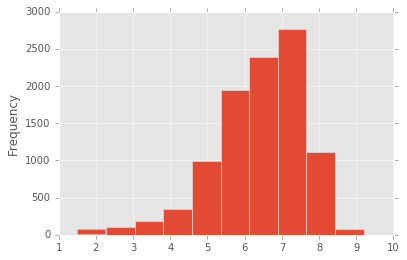

In [8]:
# use the kind argument
# notice the ; at the end
imdb['score'].plot(kind='hist');

In [9]:
imdb.columns

Index([u'title', u'year', u'score', u'votes', u'length', u'genres'], dtype='object')

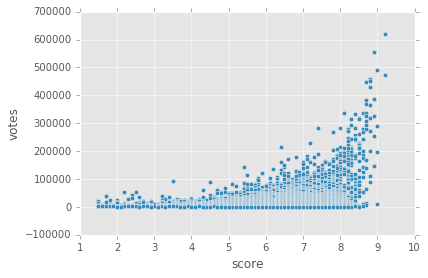

In [10]:
# use the x and y axis arguments
imdb.plot(kind='scatter', x='score', y='votes');

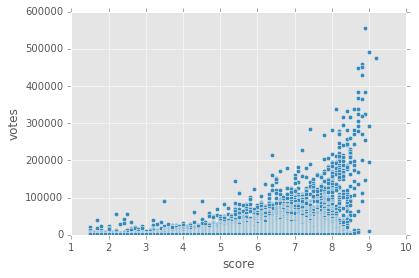

In [11]:
# the limits on the y axis are kinda annoying
imdb.plot(kind='scatter', x='score', y='votes', ylim=(0, 600000));

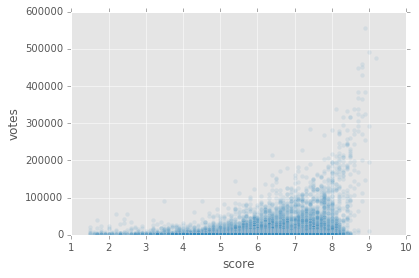

In [12]:
# the alpha argument varies transparency to see where the concentration is
imdb.plot(kind='scatter', x='score', y='votes', ylim=(0, 600000), alpha=0.1);

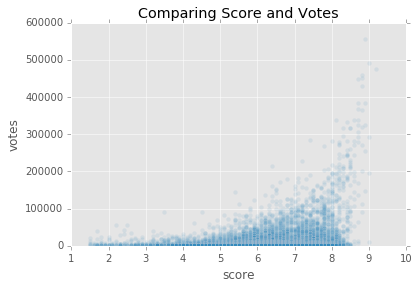

In [13]:
imdb.plot(kind='scatter', x='score', y='votes', 
          ylim=(0, 600000), alpha=0.1, title='Comparing Score and Votes');

[Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for the pandas .plot function. Bookmark it!!!!

# Visualizing data with matplotlib

## Set global parameters

In [14]:
# Set the global default size of matplotlib figures to 10 inches wide by 5 inches tall
plt.rc('figure', figsize=(10, 5))

## Drawing Lines

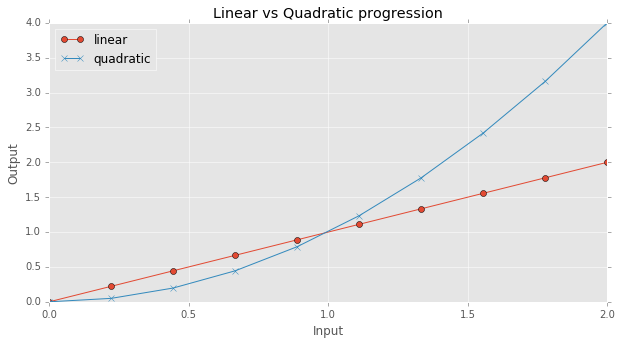

In [15]:
# drawing lines
x = np.linspace(0, 2, 10)

plt.plot(x, x, 'o-', label='linear')
plt.plot(x, x ** 2, 'x-', label='quadratic')

plt.legend(loc='best')
plt.title('Linear vs Quadratic progression')
plt.xlabel('Input')
plt.ylabel('Output');

## Drawing histograms

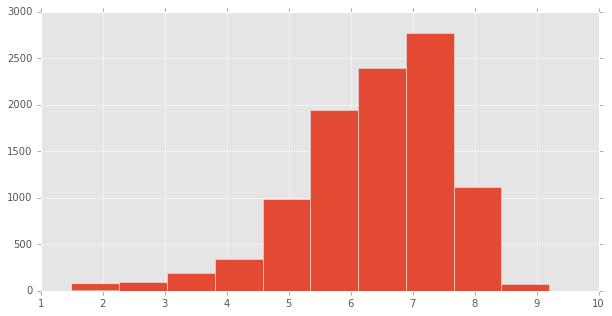

In [16]:
# drawing histograms
plt.hist(imdb['score']);

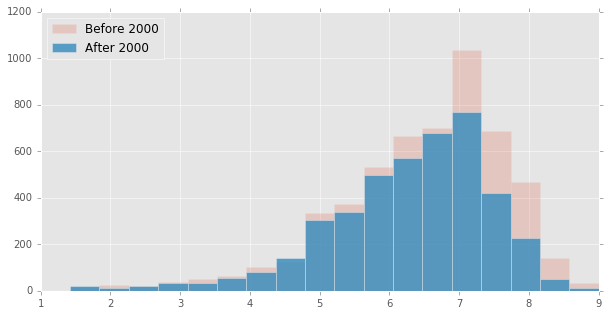

In [18]:
# drawing 2 histograms on same plot
# make sure bins are the same size
# use the alpha argument
bins = np.linspace(1, 9, 20)
plt.hist(imdb[imdb['year']<2000]['score'], bins=bins, alpha=0.2, label='Before 2000')
plt.hist(imdb[imdb['year']>2000]['score'], bins=bins, alpha=0.8, label='After 2000')
plt.legend(loc='best');

## Drawing scatterplots

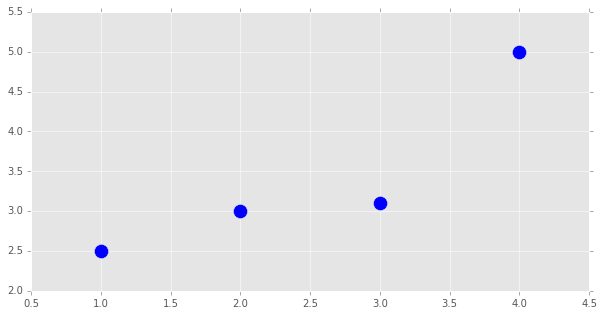

In [19]:
plt.scatter([1,2,3,4], [2.5, 3, 3.1, 5], s=200);

## Adding annotations or text

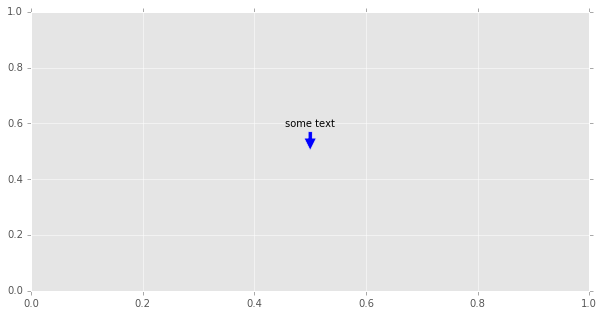

In [20]:
plt.annotate('some text', xy=(0.5,0.5), xytext=(0.5, 0.6), 
             arrowprops=dict(facecolor='blue', shrink=0.05),
             horizontalalignment='center', verticalalignment='center');

## Creating new figures in one window

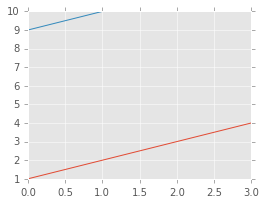

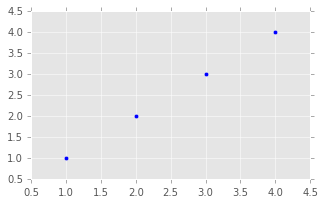

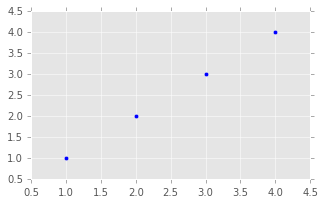

In [21]:
# create a new figure that's 4x3
# this figure is assigned to figure 1
# this is handy because it means we can
# easily put multiple charts in one window
# and switch between them
plt.figure(1, figsize=(4, 3));
plt.plot([1,2,3,4])
# create a new figure and switch to it
plt.figure(2, figsize=(5, 3));
plt.scatter([1,2,3,4], [1,2,3,4])
# switch back to 1
plt.figure(1)
plt.plot([9,10])
# create a third
plt.figure(3, figsize=(5, 3));
plt.scatter([1,2,3,4], [1,2,3,4])

## Making subplots

subplot(nrows, ncols, plot_number)

Where nrows and ncols are used to notionally split the figure into nrows * ncols sub-axes, and plot_number is used to identify the particular subplot that this function is to create within the notional grid. plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols.

In the case when nrows, ncols and plot_number are all less than 10, a convenience exists, such that the a 3 digit number can be given instead, where the hundreds represent nrows, the tens represent ncols and the units represent plot_number. For instance:

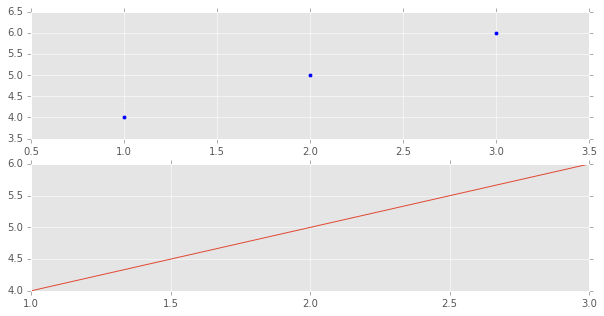

In [22]:
# plt.subplot used to make multiple plots in a single window
# 2 rows, 1 column, 1st position
plt.subplot(2,1,1)
plt.scatter([1,2,3], [4,5,6])
# 2nd position
plt.subplot(2,1,2)
plt.plot([1,2,3], [4,5,6])

# Quiz

- Give a good usecase for Pandas visualization
- Give a good usecase for using matplotlib
- Using imdb data, create a scatterplot with score on x-axis and votes on y-axis
- Put a label with the movie title using an arrow for the best scoring movie and worst scoring movie (break ties however you'd like)
- Create a histogram for score and one for votes, putting both charts in the same window
- Bonus: use seaborn to plot a fitted line on a plot showing number of votes vs score for movies that had a score greater than 7.4